In [1]:
import train
from common.drawutils import *
from osgeo import gdal
import run
import matplotlib.pyplot as plt
import pandas as pd
# todo treeyao huan, chong xin pao

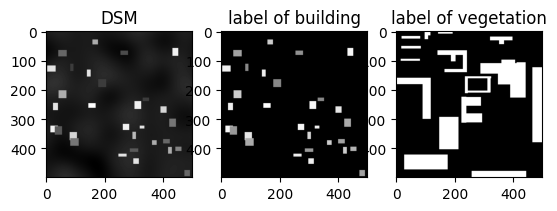

In [18]:
#In this cell, we show a monk data include a dsm tif, which is one band tif, record the altitude of each raster
b_label = gdal.Open('map/building.tif')
t_label = gdal.Open('map/vegetation.tif')
dsm = gdal.Open('map/dsm.tif')

fdsm = dsm.GetRasterBand(1).ReadAsArray(0,0,500,500)
fb = b_label.GetRasterBand(1).ReadAsArray(0,0,500,500)
ft = t_label.GetRasterBand(1).ReadAsArray(0,0,500,500)
fig, axs = plt.subplots(1, 3)
axs[0].imshow(fdsm, cmap='gray')
axs[0].set_title('DSM')
axs[1].imshow(fb, cmap='gray')
axs[1].set_title('label of building')
axs[2].imshow(ft, cmap='gray')
axs[2].set_title('label of vegetation')
plt.savefig('map/mock_data.png')

In [5]:
# training model
opt = train.parse_opt(True, 'RDDPG', 200)
logPath_RDDPG = train.train(opt)

100%|██████████| 200/200 [1:50:46<00:00, 33.23s/it]

best_epreward: 153.06150314211845


In [14]:
# testing model
opt = run.parse_opt(True,  algorithm='RDDPG', modelname=logPath_RDDPG+'final.pt', net='resnet18')
run.test(opt)

ep_reward: 145.87552392482758


'RDDPG_1720439330'

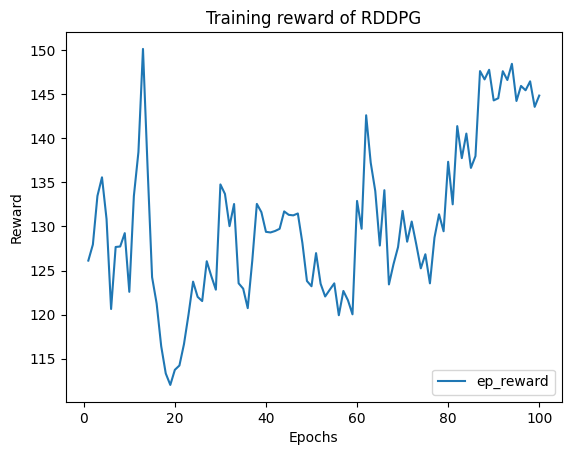

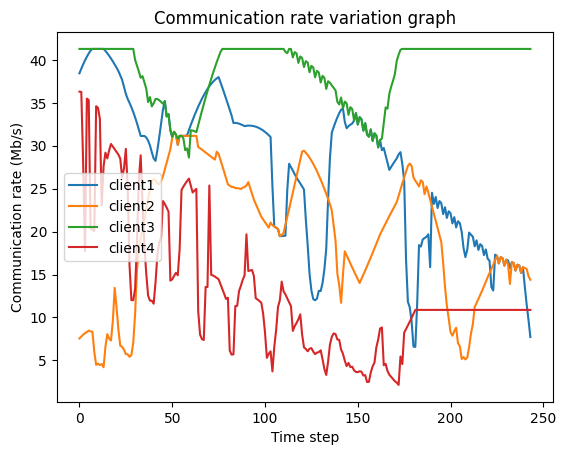

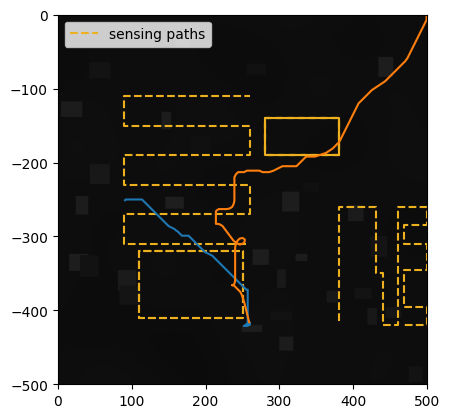

In [2]:
# analyse result
logPath_RDDPG = 'RDDPG_1720439330'
drawTrainingReward(logPath_RDDPG, 'RDDPG')
drawClientsRateChangeLine(logPath_RDDPG)
drawRadiosTrace(logPath_RDDPG)

In [6]:
opt = train.parse_opt(True, 'DDPG', 200)
logPath_DDPG = train.train(opt)

100%|██████████| 200/200 [1:29:23<00:00, 26.82s/it]

best_epreward: 151.2985253930092


In [9]:
opt = run.parse_opt(True, algorithm='DDPG', modelname=logPath_DDPG+'final.pt', statetype='vector')
run.test(opt)

ep_reward: 146.71637427806854


'DDPG_1720781367final'

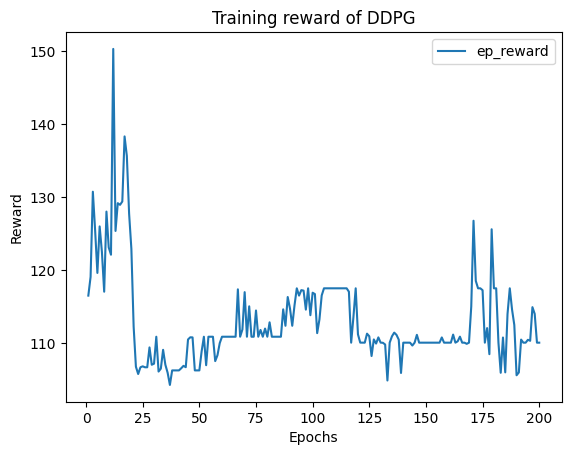

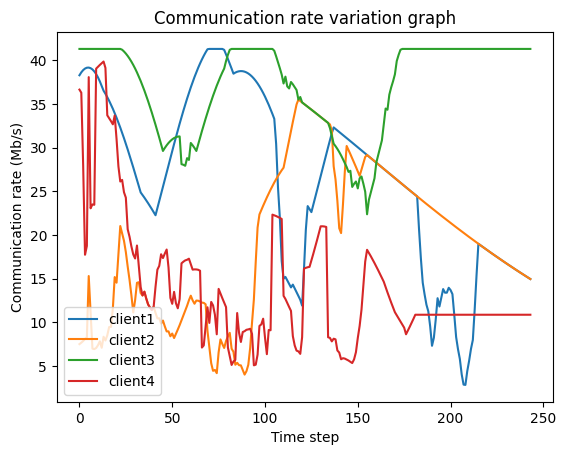

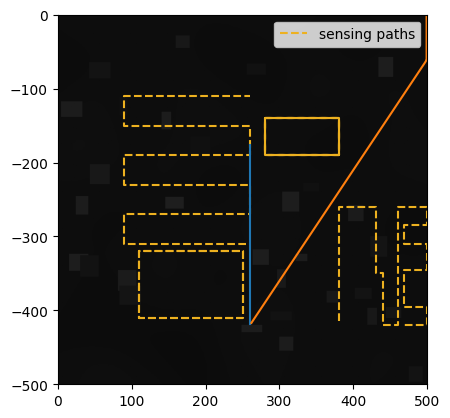

In [5]:
logPath_DDPG = 'DDPG_1720516061'
drawTrainingReward(logPath_DDPG, 'DDPG')
drawClientsRateChangeLine(logPath_DDPG)
drawRadiosTrace(logPath_DDPG)

ep_reward: 120.40099439769983


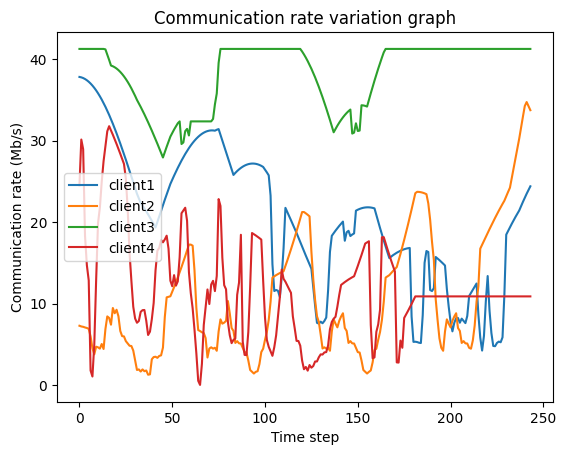

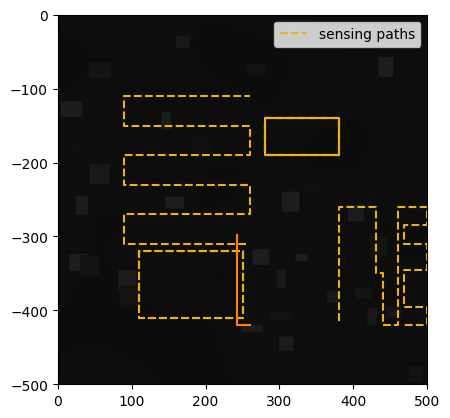

In [66]:
opt = run.parse_opt(True, algorithm='center')
analyseLogPath_center = run.test(opt)
drawClientsRateChangeLine(analyseLogPath_center)
drawRadiosTrace(analyseLogPath_center)

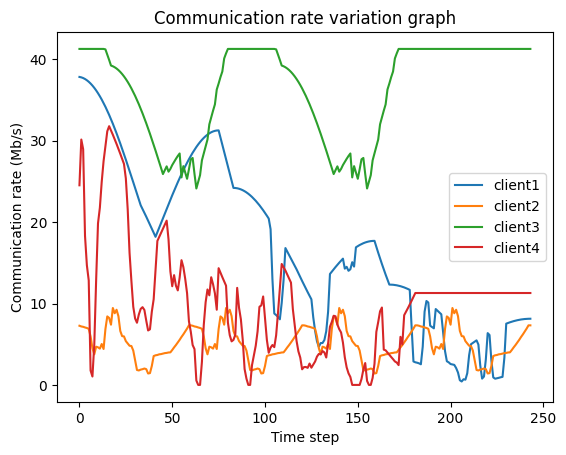

In [77]:
opt = run.parse_opt(True, algorithm='withoutRadio')
analyseLogPath_wr = run.test(opt)
drawClientsRateChangeLine(analyseLogPath_wr)

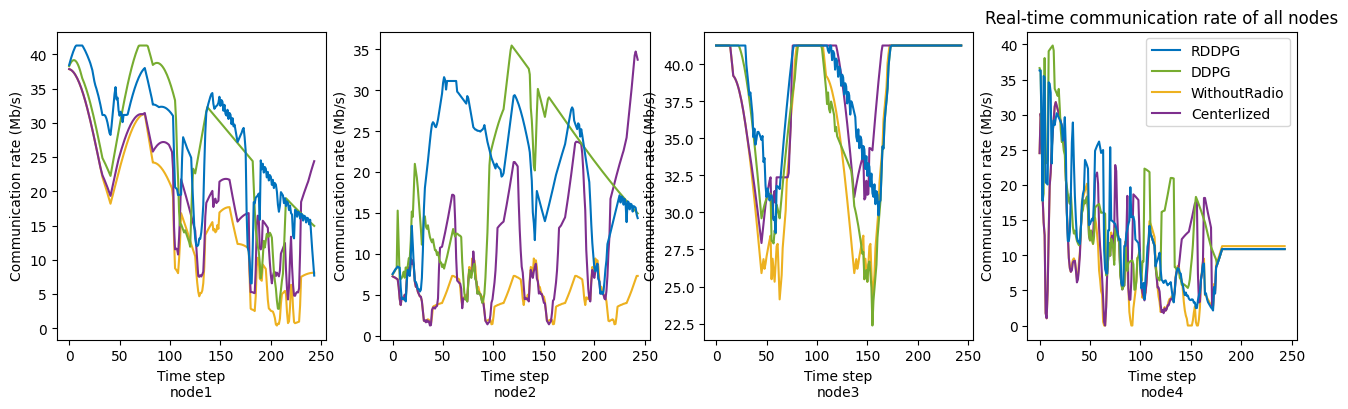

In [3]:
logPath_RDDPG = 'RDDPG_1720439330'
logPath_DDPG = 'DDPG_1720516061'
# loglists = [analyseLogPath_wr, analyseLogPath_center,logPath_DDPG, logPath_RDDPG]
loglists = ['task_test_model_withoutRadio', 'task_test_model_center',logPath_DDPG, logPath_RDDPG]
drawClientsRateCompare(loglists)

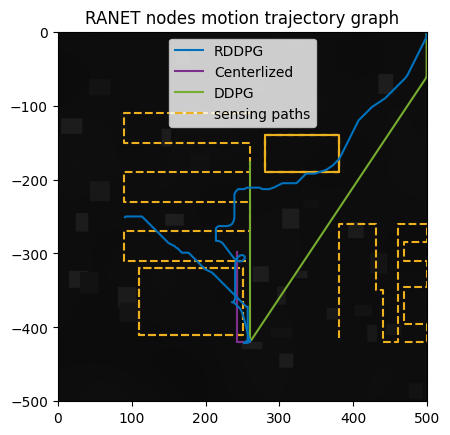

In [83]:
loglists = [analyseLogPath_center,logPath_DDPG, logPath_RDDPG]
drawRadiosTraceCompare(loglists)

In [4]:
data = calMeanRate(loglists)
row_names = ['Node 1', 'Node 2', 'Node 3', 'Node 4']
column_names = ['Without RANET node', 'Centralized deployment', 'DDPG', 'RDDPG']
df = pd.DataFrame(data, index=row_names, columns=column_names)
df

,Without RANET node,Centralized deployment,DDPG,RDDPG
Node 1,16.837779,20.485554,26.430999,27.431554
Node 2,5.116992,10.832000,18.995316,19.620394
Node 3,36.337090,38.239014,37.142099,38.720557
Node 4,10.072304,11.915627,14.112021,12.937636
